# Stage 00
# Load neccessary libraries

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

# Stage 01
# Load Data as DataFrame By Pandas

In [36]:
df = pd.read_excel('C:\\Users\\SirArchitect\\Desktop\\DataScience\\GermanBankAnalysis\\Germanbank.xlsx')
df

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and gender,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit risk
0,2,6.0,4,4.0,1169.0,5,5.0,4.0,3,1.0,...,1.0,67.0,4.0,2.0,2.0,3.0,1.0,1,0,1
1,2,48.0,2,4.0,5951.0,1,3.0,2.0,2,1.0,...,1.0,22.0,4.0,2.0,1.0,3.0,1.0,0,0,2
2,4,12.0,4,7.0,2096.0,1,4.0,2.0,3,1.0,...,1.0,49.0,4.0,2.0,1.0,2.0,2.0,0,0,1
3,1,42.0,2,3.0,7882.0,1,4.0,2.0,3,3.0,...,2.0,45.0,4.0,3.0,1.0,3.0,2.0,0,0,1
4,1,24.0,3,1.0,4870.0,1,3.0,3.0,3,1.0,...,4.0,53.0,4.0,3.0,2.0,3.0,2.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12.0,2,3.0,1736.0,1,4.0,3.0,2,1.0,...,1.0,31.0,4.0,2.0,1.0,2.0,1.0,0,0,1
996,1,30.0,2,2.0,3857.0,1,3.0,4.0,1,1.0,...,2.0,40.0,4.0,2.0,1.0,4.0,1.0,1,0,1
997,4,12.0,2,4.0,804.0,1,5.0,4.0,3,1.0,...,3.0,38.0,4.0,2.0,1.0,3.0,1.0,0,0,1
998,1,45.0,2,4.0,1845.0,1,3.0,4.0,3,1.0,...,4.0,23.0,4.0,3.0,1.0,3.0,1.0,1,0,2


# Stage 02
# Intial Evaluation of Data of "German Bank"

In [18]:
df.describe()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and gender,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit risk
count,1000.00000,997.000000,1000.00000,995.000000,977.000000,1000.000000,983.000000,978.000000,1000.00000,991.000000,...,981.000000,995.000000,997.000000,991.000000,996.000000,996.000000,980.000000,1000.000000,1000.000000,1000.000000
mean,2.57800,20.875627,2.54500,3.822111,3271.610645,2.105000,3.378433,2.974438,2.68200,1.146317,...,2.360856,35.567839,3.487462,1.928355,1.408635,2.903614,1.157143,0.404000,0.037000,1.300000
std,1.25678,12.045620,1.08312,2.740910,2811.334137,1.580023,1.212302,1.115794,0.70808,0.479672,...,1.050878,11.373226,1.087116,0.531734,0.578237,0.654898,0.364121,0.490943,0.188856,0.458487
min,1.00000,4.000000,0.00000,1.000000,250.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.00000,12.000000,2.00000,2.000000,1371.000000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.000000,4.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
50%,2.00000,18.000000,2.00000,3.000000,2320.000000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.000000,4.000000,2.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000
75%,4.00000,24.000000,4.00000,4.000000,3972.000000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.000000,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,0.000000,2.000000
max,4.00000,72.000000,4.00000,11.000000,18424.000000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.000000,4.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,2.000000


In [42]:
df.values

array([[ 2.,  6.,  4., ...,  1.,  0.,  1.],
       [ 2., 48.,  2., ...,  0.,  0.,  2.],
       [ 4., 12.,  4., ...,  0.,  0.,  1.],
       ...,
       [ 4., 12.,  2., ...,  0.,  0.,  1.],
       [ 1., 45.,  2., ...,  1.,  0.,  2.],
       [ 2., 45.,  4., ...,  0.,  0.,  1.]])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing checking account                       1000 non-null   int64  
 1   Duration in month                                         997 non-null    float64
 2   Credit history                                            1000 non-null   int64  
 3   Purpose                                                   995 non-null    float64
 4   Credit amount                                             977 non-null    float64
 5   Savings account/bonds                                     1000 non-null   int64  
 6   Present employment since                                  983 non-null    float64
 7   Installment rate in percentage of disposable income       978 non-null    float64
 8   Personal status and

In [38]:
df.shape

(1000, 21)

In [39]:
df.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history  ', 'Purpose', 'Credit amount ',
       'Savings account/bonds', 'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and gender ', 'Other debtors / guarantors ',
       'Present residence since', 'Property ', 'Age in years ',
       'Other installment plans ', 'Housing',
       'Number of existing credits at this bank', 'Job ',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Credit risk'],
      dtype='object')

In [40]:
List_of_Columns = df.columns.tolist()
for i, item in enumerate (List_of_Columns):
    print (i, item)

0 Status of existing checking account
1 Duration in month
2 Credit history  
3 Purpose
4 Credit amount 
5 Savings account/bonds
6 Present employment since
7 Installment rate in percentage of disposable income
8 Personal status and gender 
9 Other debtors / guarantors 
10 Present residence since
11 Property 
12 Age in years 
13 Other installment plans 
14 Housing
15 Number of existing credits at this bank
16 Job 
17 Number of people being liable to provide maintenance for
18 Telephone
19 foreign worker
20 Credit risk


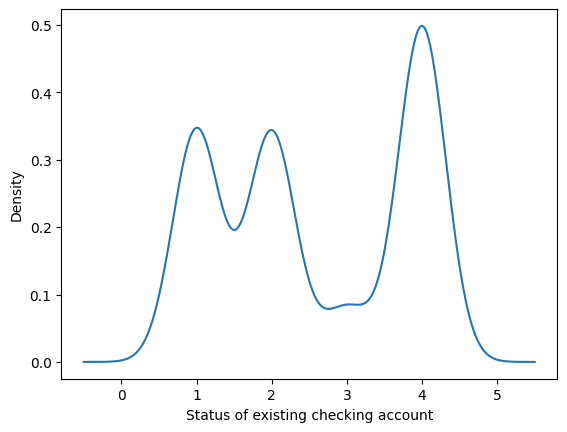

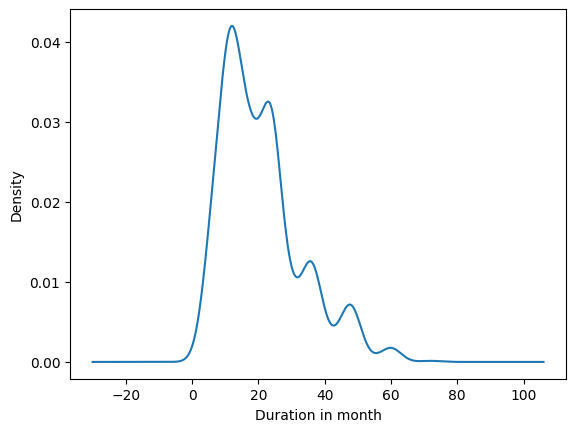

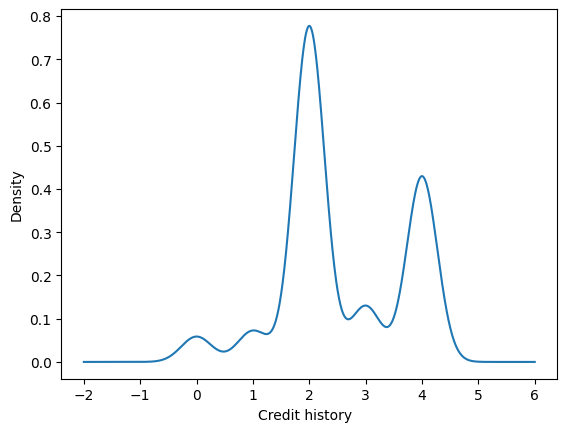

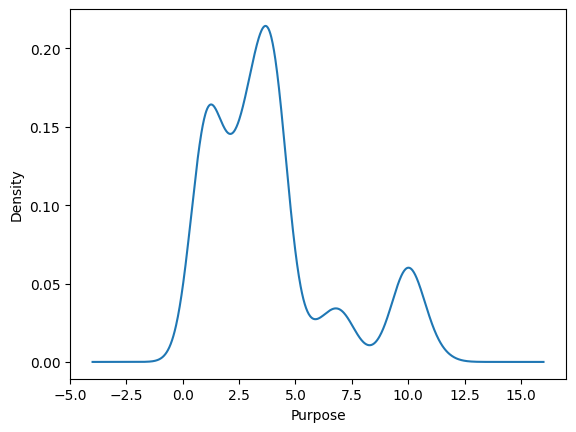

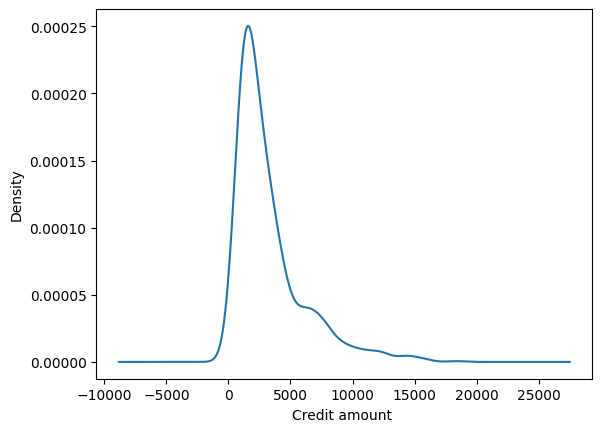

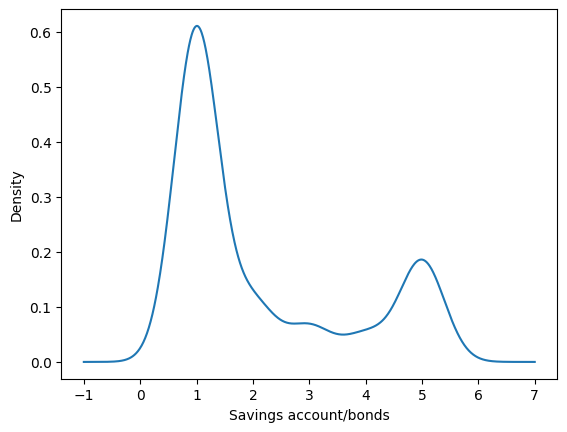

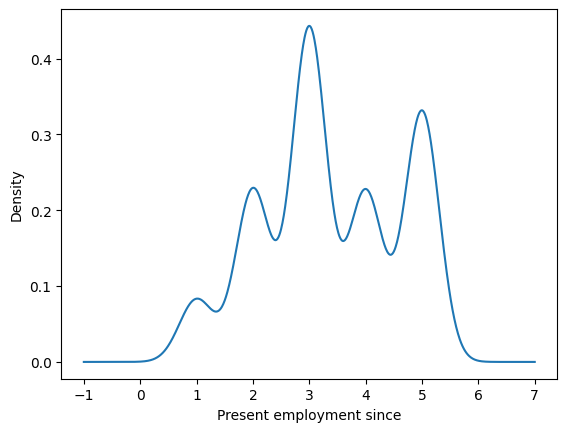

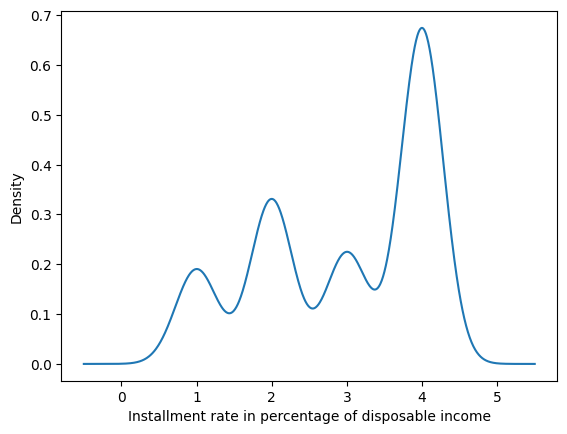

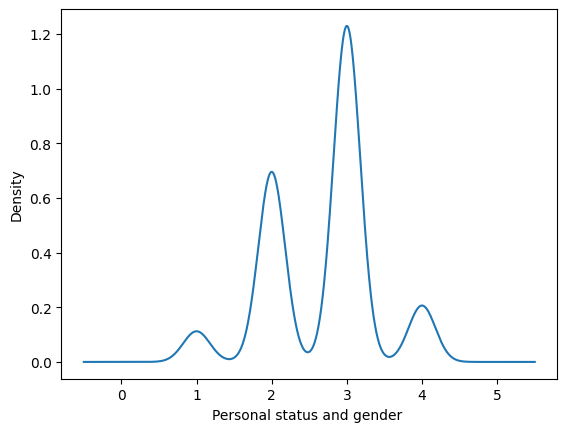

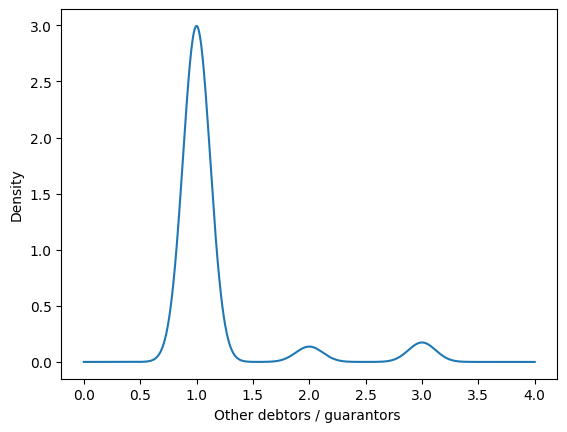

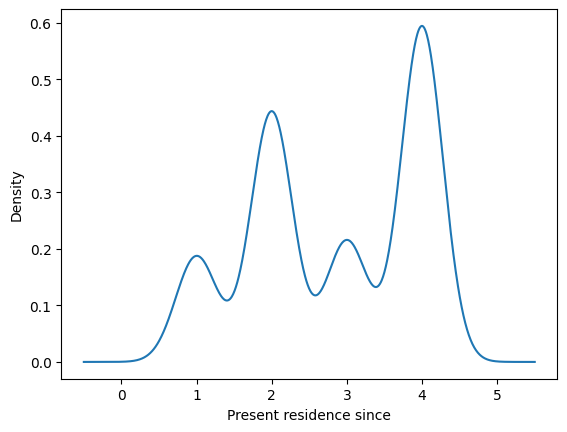

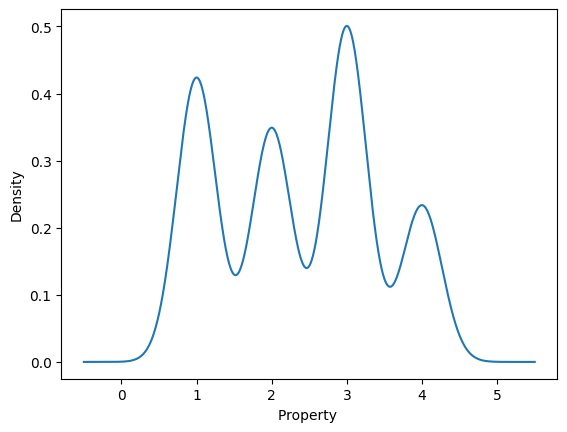

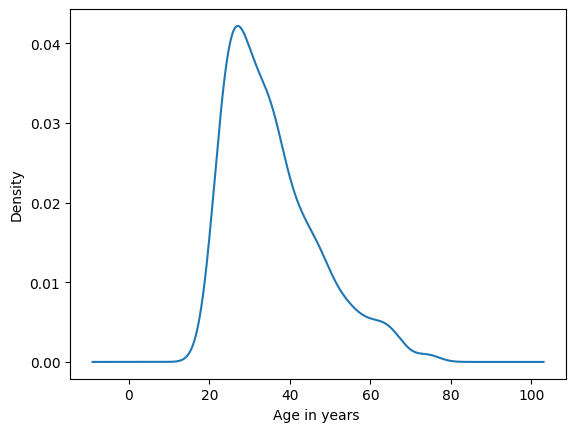

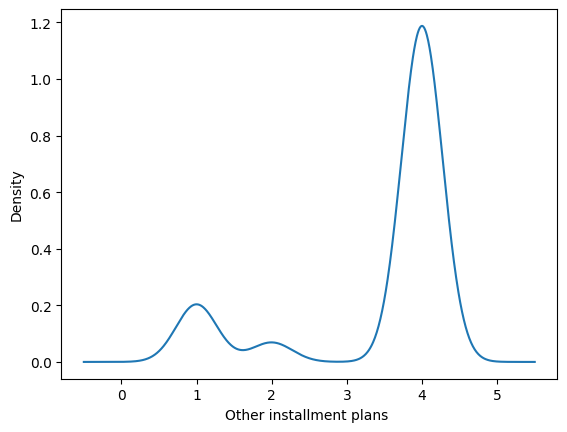

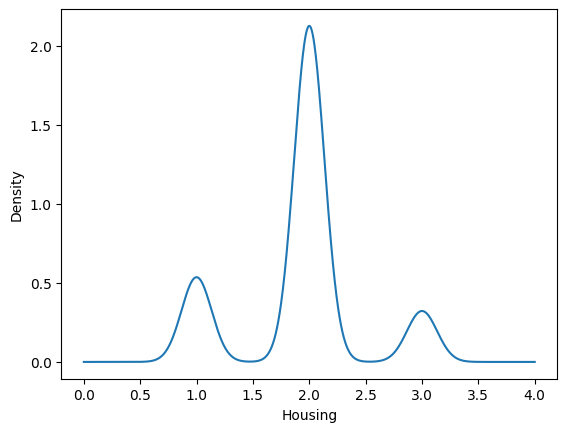

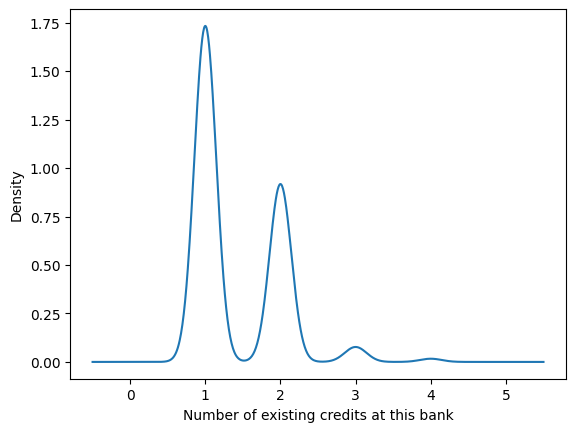

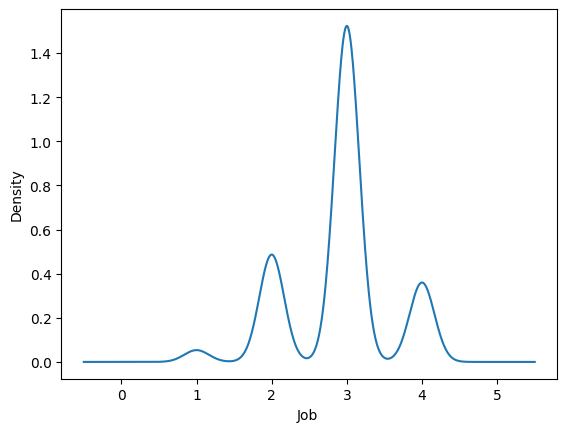

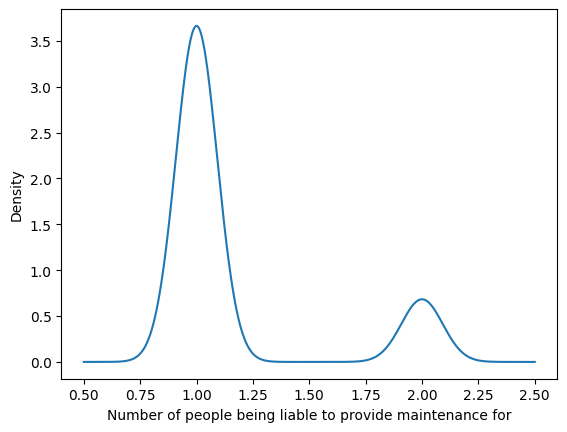

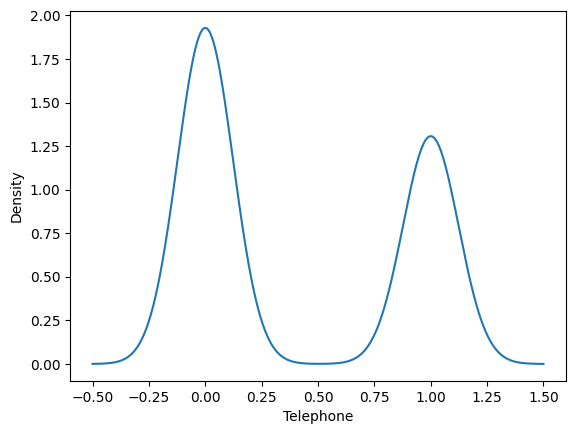

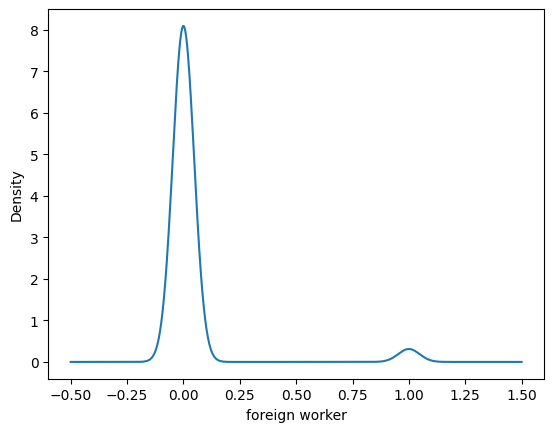

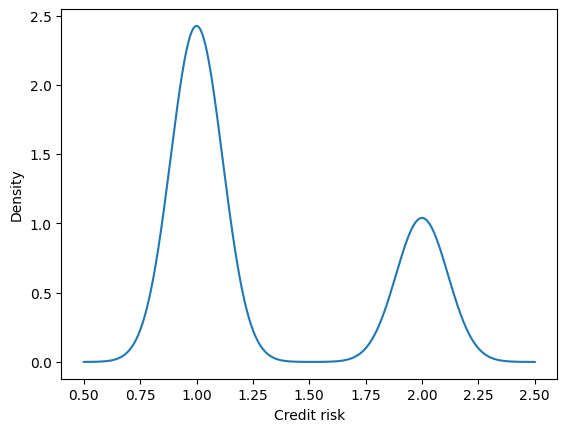

In [45]:
list_of_Column = df.columns.tolist()
#list_of_Column
for i, item in enumerate(list_of_Column):
  df[item].plot(kind='kde')
  plt.xlabel(item)
  plt.show()

In [46]:
len(df.columns)

21

# Evalute contents and  it's amount 4 each column

In [41]:
List_of_Columns = df.columns.tolist()
for i, item in enumerate (List_of_Columns):
    Objects_in_Each_column = df[item].value_counts()
    print (Objects_in_Each_column)

4    394
1    273
2    270
3     63
Name: Status of existing checking account, dtype: int64
24.0    184
12.0    178
18.0    113
36.0     82
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
60.0     13
27.0     13
42.0     10
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
47.0      1
5.0       1
26.0      1
72.0      1
40.0      1
Name: Duration in month, dtype: int64
2    530
4    293
3     88
1     49
0     40
Name: Credit history  , dtype: int64
4.0     279
1.0     233
3.0     180
2.0     103
10.0     96
7.0      49
6.0      22
5.0      12
11.0     12
9.0       9
Name: Purpose, dtype: int64
1258.0    3
1262.0    3
1393.0    3
1478.0    3
1275.0    3
         ..
1766.0    1
2473.0    1
1542.0    1
3850.0    1
4576.0    1
Name: Credit amount , Length: 900, dtype: int64
1    603
5    183
2    103
3     63
4     48
Name: Savings accou

#Evaluate Nulls in Data

In [43]:
df.isnull().sum()

Status of existing checking account                          0
Duration in month                                            3
Credit history                                               0
Purpose                                                      5
Credit amount                                               23
Savings account/bonds                                        0
Present employment since                                    17
Installment rate in percentage of disposable income         22
Personal status and gender                                   0
Other debtors / guarantors                                   9
Present residence since                                      0
Property                                                    19
Age in years                                                 5
Other installment plans                                      3
Housing                                                      9
Number of existing credits at this bank                

In [44]:
df[df.isnull().any(axis=1)]

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and gender,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit risk
12,2,12.0,2,4.0,1567.0,1,3.0,NaN,2,1.0,...,3.0,22.0,4.0,2.0,1.0,3.0,1.0,1,0,1
13,1,24.0,4,1.0,1199.0,1,5.0,NaN,3,1.0,...,3.0,60.0,4.0,2.0,2.0,2.0,1.0,0,0,2
20,4,9.0,4,1.0,2134.0,1,3.0,4.0,3,1.0,...,3.0,48.0,NaN,2.0,3.0,3.0,1.0,1,0,1
21,1,6.0,2,4.0,2647.0,3,3.0,2.0,3,1.0,...,1.0,44.0,NaN,1.0,1.0,3.0,2.0,0,0,1
22,1,10.0,4,1.0,2241.0,1,2.0,1.0,3,1.0,...,1.0,48.0,NaN,1.0,2.0,2.0,2.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,3,18.0,1,4.0,1445.0,5,4.0,NaN,3,1.0,...,3.0,49.0,1.0,2.0,1.0,2.0,1.0,0,0,1
283,4,15.0,4,3.0,1520.0,5,5.0,NaN,3,1.0,...,2.0,63.0,4.0,2.0,1.0,3.0,1.0,0,0,1
284,2,24.0,4,1.0,3878.0,2,2.0,NaN,1,1.0,...,3.0,37.0,4.0,2.0,1.0,3.0,1.0,1,0,1
285,1,47.0,2,1.0,10722.0,1,2.0,NaN,2,1.0,...,1.0,35.0,4.0,2.0,1.0,2.0,1.0,1,0,1
